In [5]:
import textstat
import pandas as pd

In [64]:
def textstat_analysis(text):
    # 计算音节数
    syllable_count = textstat.syllable_count(text)
    # 计算词汇数（词的数量）
    lexicon_count = textstat.lexicon_count(text, removepunct=True)
    # 计算难词数（多音节单词数）
    difficult_words = textstat.difficult_words(text)
    #计算易读度
    flesch_reading_ease = textstat.flesch_reading_ease(text)
    # 计算句子数
    sentence_count = textstat.sentence_count(text)
    # print(f"Syllable Count: {syllable_count}")
    # print(f"Lexicon Count: {lexicon_count}")
    # print(f"Difficult Words: {difficult_words}")
    # print(f"Flesch Reading Ease: {flesch_reading_ease}")
    # print(f"Sentence Count: {sentence_count}")
    return syllable_count, lexicon_count, difficult_words, flesch_reading_ease, sentence_count
def cal_mean_std(data):
    # if len(data) == 0:
    #     return 0, 0
    # else:
    #     mean = sum(data) / len(data)
    #     std = (sum([(i - mean) ** 2 for i in data]) / len(data)) ** 0.5
    #     return mean, std
    mean = sum(data) / len(data)
    std = (sum([(i - mean) ** 2 for i in data]) / len(data)) ** 0.5
    return round(mean,2), round(std,2)

def t_test_p(text_list1,text_list2):
    # 进行独立样本 t 检验或非参数检验（Mann-Whitney U 检验）
    stat, p_value = stats.ttest_ind(lexicon_counts_1, lexicon_counts_2)
    print(f"Original p-value from t-test: {p_value}")

    # 假设有多个比较或检验的 p 值（可以自行添加其他 p 值）
    p_values = [p_value, 0.03, 0.05, 0.06] # 添加多个假设的 p 值

    # 使用 Benjamini-Hochberg 校正 p 值
    adjusted_p_values = multitest.multipletests(p_values, method='fdr_bh')[1]

    # 打印校正后的 p 值
    print(f"Adjusted p-values (Benjamini-Hochberg correction): {adjusted_p_values}")
    
def textstat_analysis_cal_mean_std(text_list):
    syllable_count_list = []
    lexicon_count_list = []
    difficult_words_list = []
    flesch_reading_ease_list = []
    sentence_count_list = []
    for text in text_list:
        syllable_count, lexicon_count, difficult_words, flesch_reading_ease, sentence_count = textstat_analysis(text)
        syllable_count_list.append(syllable_count)
        lexicon_count_list.append(lexicon_count)
        difficult_words_list.append(difficult_words)
        flesch_reading_ease_list.append(flesch_reading_ease)
        sentence_count_list.append(sentence_count)
    syllable_count_mean, syllable_count_std = cal_mean_std(syllable_count_list)
    lexicon_count_mean, lexicon_count_std = cal_mean_std(lexicon_count_list)
    difficult_words_mean, difficult_words_std = cal_mean_std(difficult_words_list)
    flesch_reading_ease_mean, flesch_reading_ease_std = cal_mean_std(flesch_reading_ease_list)
    sentence_count_mean, sentence_count_std = cal_mean_std(sentence_count_list)
    # print(f"Syllable Count Mean: {syllable_count_mean}, Syllable Count Std: {syllable_count_std}")
    # print(f"Lexicon Count Mean: {lexicon_count_mean}, Lexicon Count Std: {lexicon_count_std}")
    # print(f"Difficult Words Mean: {difficult_words_mean}, Difficult Words Std: {difficult_words_std}")
    # print(f"Flesch Reading Ease Mean: {flesch_reading_ease_mean}, Flesch Reading Ease Std: {flesch_reading_ease_std}")
    # print(f"Sentence Count Mean: {sentence_count_mean}, Sentence Count Std: {sentence_count_std}")
    return f'{syllable_count_mean} ({syllable_count_std})', f'{lexicon_count_mean} ({lexicon_count_std})', f'{difficult_words_mean} ({difficult_words_std})', f'{flesch_reading_ease_mean} ({flesch_reading_ease_std})', f'{sentence_count_mean} ({sentence_count_std})'

In [65]:
manual_trans={'ad':[],'hc':[]}
ASR_trans={'ad':[],'hc':[]}
manual_train_path = '/mnt/hd/data_lyl/projects/LLMEmbed/error_analysis/manual_trans/train_manual.csv'
manual_test_path = '/mnt/hd/data_lyl/projects/LLMEmbed/error_analysis/manual_trans/test_manual.csv'
ASR_train_path = '/mnt/hd/data_lyl/projects/LLMEmbed/error_analysis/whisper_large_original_trans/train_chas_A.csv'
ASR_test_path = '/mnt/hd/data_lyl/projects/LLMEmbed/error_analysis/whisper_large_original_trans/test_chas_A.csv'
manual_train_data = pd.read_csv(manual_train_path)
manual_test_data = pd.read_csv(manual_test_path)
manual_data=pd.concat([manual_train_data,manual_test_data])
ASR_train_data = pd.read_csv(ASR_train_path)
ASR_test_data = pd.read_csv(ASR_test_path)
ASR_data=pd.concat([ASR_train_data,ASR_test_data])
#将数据按照ad和hc分开
for index, row in manual_data.iterrows():
    if row['ad'] == 0:
        manual_trans['hc'].append(row['joined_all_par_trans'])
    elif row['ad'] == 1:
        manual_trans['ad'].append(row['joined_all_par_trans'])
for index, row in ASR_data.iterrows():
    if row['ad'] == 0:
        ASR_trans['hc'].append(row['joined_all_par_trans'])
    elif row['ad'] == 1:
        ASR_trans['ad'].append(row['joined_all_par_trans'])
print(len(ASR_trans['ad']))
print(len(ASR_trans['hc']))

78
78


In [66]:
hc_syllable,hc_lexicon,hc_difficult,hc_flesch,hc_sentence=textstat_analysis_cal_mean_std(ASR_trans['hc'])
ad_syllable,ad_lexicon,ad_difficult,ad_flesch,ad_sentence=textstat_analysis_cal_mean_std(ASR_trans['ad'])
asr_text_statistics=['asr','hc / ad', f'{hc_syllable} / {ad_syllable}',f'{hc_lexicon} / {ad_lexicon}',f'{hc_difficult} / {ad_difficult}',f'{hc_flesch} / {ad_flesch}',f'{hc_sentence} / {ad_sentence}']
print(asr_text_statistics)

hc_syllable,hc_lexicon,hc_difficult,hc_flesch,hc_sentence=textstat_analysis_cal_mean_std(manual_trans['hc'])
ad_syllable,ad_lexicon,ad_difficult,ad_flesch,ad_sentence=textstat_analysis_cal_mean_std(manual_trans['ad'])
manual_text_statistics=['manual','hc / ad', f'{hc_syllable} / {ad_syllable}',f'{hc_lexicon} / {ad_lexicon}',f'{hc_difficult} / {ad_difficult}',f'{hc_flesch} / {ad_flesch}',f'{hc_sentence} / {ad_sentence}']
print(manual_text_statistics)



['asr', 'hc / ad', '128.56 (79.41) / 95.24 (59.58)', '102.88 (65.7) / 79.42 (50.55)', '9.26 (4.05) / 5.24 (3.52)', '91.05 (5.33) / 96.72 (6.66)', '11.33 (5.85) / 10.0 (6.62)']
['manual', 'hc / ad', '142.81 (79.13) / 115.31 (72.46)', '114.24 (66.16) / 96.21 (61.77)', '10.73 (3.69) / 6.64 (3.5)', '89.81 (4.89) / 96.05 (5.94)', '12.08 (5.5) / 11.05 (6.15)']


In [67]:
import csv
# 指定 CSV 文件名
filename = 'whisper_large_original_text_statistics.csv'
# 定义列名
columns = ['Source', 'Comparison', 'Syllable Count', 'Lexicon Count', 'Difficult Words', 'Flesch Reading Ease', 'Sentence Count']
# 打开文件，准备写入
with open(filename, 'w', newline='') as csvfile:
    # 创建 CSV 写入器
    csvwriter = csv.writer(csvfile)
    # 遍历两个列表的索引
    for i in range(len(asr_text_statistics)):
        # 写入一行数据，包括两个列表的对应元素
        csvwriter.writerow([columns[i], manual_text_statistics[i], asr_text_statistics[i]])
        
print(f"数据已写入 {filename}")

数据已写入 whisper_large_original_text_statistics.csv


In [68]:
import textstat
from scipy import stats
import statsmodels.stats.multitest as multitest

# 两个语料库的示例
corpus1 = ["This is the first sentence.", "Here is another example.", "Text data one."]
corpus2 = ["Another sentence for corpus two.", "Yet another example.", "Text data two."]

# 计算每个语料库中的文本词汇数
lexicon_counts_1 = [textstat.lexicon_count(text, removepunct=True) for text in corpus1]
lexicon_counts_2 = [textstat.lexicon_count(text, removepunct=True) for text in corpus2]

# 打印 lexicon counts
print("Lexicon counts for corpus 1:", lexicon_counts_1)
print("Lexicon counts for corpus 2:", lexicon_counts_2)

# 对每一组词汇数量执行独立样本 t 检验，得到 p 值
stat, p_value = stats.ttest_ind(lexicon_counts_1, lexicon_counts_2)
print(f"Original p-value from t-test: {p_value}")

# 假设有多个比较或检验的 p 值（可以自行添加其他 p 值）
p_values = [p_value, 0.03, 0.05, 0.06] # 添加多个假设的 p 值

# 使用 Benjamini-Hochberg 校正 p 值
adjusted_p_values = multitest.multipletests(p_values, method='fdr_bh')[1]

# 打印校正后的 p 值
print(f"Adjusted p-values (Benjamini-Hochberg correction): {adjusted_p_values}")

# 判断所有校正后的 p 值是否都小于 0.05
all_significant = all(p < 0.05 for p in adjusted_p_values)

if all_significant:
    print("All differences are significant at p < 0.05 after Benjamini-Hochberg correction.")
else:
    print("Not all differences are significant at p < 0.05 after Benjamini-Hochberg correction.")


Lexicon counts for corpus 1: [5, 4, 3]
Lexicon counts for corpus 2: [5, 3, 3]
Original p-value from t-test: 0.7246586364960954
Adjusted p-values (Benjamini-Hochberg correction): [0.72465864 0.08       0.08       0.08      ]
Not all differences are significant at p < 0.05 after Benjamini-Hochberg correction.


In [69]:
def t_test_p(text_list1,text_list2):
    # 进行独立样本 t 检验或非参数检验（Mann-Whitney U 检验）
    stat, p_value = stats.ttest_ind(text_list1,text_list2)
    print(f"Original p-value from t-test: {p_value}")

    # # 假设有多个比较或检验的 p 值（可以自行添加其他 p 值） 
    # #这里只有一次检验，多个检验解决的是实际采集数据时候可能数据不一致的问题，
    # 然而这里的各种text_analysis函数是一次性计算的,是固定的
    # p_values = [p_value,0.06] # 添加多个假设的 p 值

    # # 使用 Benjamini-Hochberg 校正 p 值
    # adjusted_p_values = multitest.multipletests(p_values, method='fdr_bh')[1]

    # # 打印校正后的 p 值
    # print(f"Adjusted p-values (Benjamini-Hochberg correction): {adjusted_p_values}")
    # # for i in adjusted_p_values:
    # #     print(i)
    # all_significant = all(p < 0.05 for p in adjusted_p_values)
    # if all_significant:
    #     print("All differences are significant at p < 0.05 after Benjamini-Hochberg correction.")
    # else:
    #     print("Not all differences are significant at p < 0.05 after Benjamini-Hochberg correction.")
    if p_value<0.05:
        print("All differences are significant at p < 0.05 after Benjamini-Hochberg correction.")
    else:
        print("Not all differences are significant at p < 0.05 after Benjamini-Hochberg correction.")

In [72]:

def t_test_asr_manual(trans):
    text_analysis={'syllable_count_list':[],'lexicon_count_list':[],'difficult_words_list':[],'flesch_reading_ease_list':[],'sentence_count_list':[]}
    for label in ['hc','ad']:
        syllable_count_list = []
        lexicon_count_list = []
        difficult_words_list = []
        flesch_reading_ease_list = []
        sentence_count_list = []
        for text in trans[label]:
            syllable_count, lexicon_count, difficult_words, flesch_reading_ease, sentence_count = textstat_analysis(text)
            syllable_count_list.append(syllable_count)
            lexicon_count_list.append(lexicon_count)
            difficult_words_list.append(difficult_words)
            flesch_reading_ease_list.append(flesch_reading_ease)
            sentence_count_list.append(sentence_count)
        text_analysis['syllable_count_list'].append(syllable_count_list)
        text_analysis['lexicon_count_list'].append(lexicon_count_list)
        text_analysis['difficult_words_list'].append(difficult_words_list)
        text_analysis['flesch_reading_ease_list'].append(flesch_reading_ease_list)
        text_analysis['sentence_count_list'].append(sentence_count_list)
    # 进行独立样本 t 检验或非参数检验（Mann-Whitney U 检验）
    for key in text_analysis.keys():
        print(key)
        t_test_p(text_analysis[key][0],text_analysis[key][1])
    # print(text_analysis['syllable_count_list'])
    # print(text_analysis['lexicon_count_list'])
print('manual_trans')
t_test_asr_manual(manual_trans)
print('ASR_trans')
t_test_asr_manual(ASR_trans)
    

manual_trans
syllable_count_list
Original p-value from t-test: 0.02593410441143166
All differences are significant at p < 0.05 after Benjamini-Hochberg correction.
lexicon_count_list
Original p-value from t-test: 0.08230438401220479
Not all differences are significant at p < 0.05 after Benjamini-Hochberg correction.
difficult_words_list
Original p-value from t-test: 5.241775691646573e-11
All differences are significant at p < 0.05 after Benjamini-Hochberg correction.
flesch_reading_ease_list
Original p-value from t-test: 3.930076069282276e-11
All differences are significant at p < 0.05 after Benjamini-Hochberg correction.
sentence_count_list
Original p-value from t-test: 0.2770393816973863
Not all differences are significant at p < 0.05 after Benjamini-Hochberg correction.
ASR_trans
syllable_count_list
Original p-value from t-test: 0.0037291956501564355
All differences are significant at p < 0.05 after Benjamini-Hochberg correction.
lexicon_count_list
Original p-value from t-test: 0.01

In [13]:
ASR_manual={'ad':{'asr':ASR_trans['ad'],'manual':manual_trans['ad']},'hc':{'asr':ASR_trans['hc'],'manual':manual_trans['hc']}}
def t_test_asr_manual_1(trans):
    text_analysis={'syllable_count_list':[],'lexicon_count_list':[],'difficult_words_list':[],'flesch_reading_ease_list':[],'sentence_count_list':[]}
    for label in ['asr','manual']:
        syllable_count_list = []
        lexicon_count_list = []
        difficult_words_list = []
        flesch_reading_ease_list = []
        sentence_count_list = []
        for text in trans[label]:
            syllable_count, lexicon_count, difficult_words, flesch_reading_ease, sentence_count = textstat_analysis(text)
            syllable_count_list.append(syllable_count)
            lexicon_count_list.append(lexicon_count)
            difficult_words_list.append(difficult_words)
            flesch_reading_ease_list.append(flesch_reading_ease)
            sentence_count_list.append(sentence_count)
        text_analysis['syllable_count_list'].append(syllable_count_list)
        text_analysis['lexicon_count_list'].append(lexicon_count_list)
        text_analysis['difficult_words_list'].append(difficult_words_list)
        text_analysis['flesch_reading_ease_list'].append(flesch_reading_ease_list)
        text_analysis['sentence_count_list'].append(sentence_count_list)
    # 进行独立样本 t 检验或非参数检验（Mann-Whitney U 检验）
    for key in text_analysis.keys():
        print(key)
        t_test_p(text_analysis[key][0],text_analysis[key][1])
    # print(text_analysis['syllable_count_list'])
    # print(text_analysis['lexicon_count_list'])
print('ASR vs Manual')  
print('ad')  
t_test_asr_manual_1(ASR_manual['ad'])
print('hc')
t_test_asr_manual_1(ASR_manual['hc'])
    

ASR vs Manual
ad


syllable_count_list
Original p-value from t-test: 0.46035383779091044
Not all differences are significant at p < 0.05 after Benjamini-Hochberg correction.
lexicon_count_list
Original p-value from t-test: 0.3089416583272386
Not all differences are significant at p < 0.05 after Benjamini-Hochberg correction.
difficult_words_list
Original p-value from t-test: 0.00131197978409272
All differences are significant at p < 0.05 after Benjamini-Hochberg correction.
flesch_reading_ease_list
Original p-value from t-test: 0.20672489029078875
Not all differences are significant at p < 0.05 after Benjamini-Hochberg correction.
sentence_count_list
Original p-value from t-test: 0.561270816382501
Not all differences are significant at p < 0.05 after Benjamini-Hochberg correction.
hc
syllable_count_list
Original p-value from t-test: 0.580329108379396
Not all differences are significant at p < 0.05 after Benjamini-Hochberg correction.
lexicon_count_list
Original p-value from t-test: 0.5671261023127242
Not

#cal Jaccard’s index J(P,C)= |P ∩ C|/|P ∪ C|

In [14]:
import re

def remove_punctuation(text):
    # 使用正则表达式去除标点符号
    return re.sub(r'[^\w\s]', '', text)

# 示例文本
text = "Hello, world! ...This is a test sentence."
clean_text = remove_punctuation(text)

print(clean_text)

Hello world This is a test sentence


In [15]:
#提取一句话中的单词
import re
def extract_words(text):
    if type(text) == str:
        words = re.findall(r'\b\w+\b', text)
        return words
    elif type(text) == list:
        words_list = []
        for t in text:
            words = re.findall(r'\b\w+\b', remove_punctuation(t))
            words_list.extend(words)
        return set(words_list)
manual_words={'ad':[],'hc':[]}
ASR_words={'ad':[],'hc':[]}
manual_words['ad'] = extract_words(manual_trans['ad'])
manual_words['hc'] = extract_words(manual_trans['hc'])
ASR_words['ad'] = extract_words(ASR_trans['ad'])
ASR_words['hc'] = extract_words(ASR_trans['hc'])
#manual Jaccard similarity
manual_ad_hc_jaccard = len(manual_words['ad'].intersection(manual_words['hc'])) / len(manual_words['ad'].union(manual_words['hc']))
print(f"Manual AD vs. HC Jaccard Similarity: {round(manual_ad_hc_jaccard,4)}")
#ASR Jaccard similarity
ASR_ad_hc_jaccard = len(ASR_words['ad'].intersection(ASR_words['hc'])) / len(ASR_words['ad'].union(ASR_words['hc']))
print(f"ASR AD vs. HC Jaccard Similarity: {round(ASR_ad_hc_jaccard,4)}")



Manual AD vs. HC Jaccard Similarity: 0.4042
ASR AD vs. HC Jaccard Similarity: 0.3434


#cal Kullback-Leibler Divergence

In [16]:
manual_ad_document = remove_punctuation(' '.join(manual_trans['ad']))
manual_hc_document = remove_punctuation(' '.join(manual_trans['hc']))
ASR_ad_document = remove_punctuation(' '.join(ASR_trans['ad']))
ASR_hc_document = remove_punctuation(' '.join(ASR_trans['hc']))
manual_ad_hc_document = remove_punctuation(manual_ad_document + ' ' + manual_hc_document)
ASR_ad_hc_document = remove_punctuation(ASR_ad_document + ' ' + ASR_hc_document)
#计算一段文本的词汇数
manual_ad_hc_lexicon_count = textstat.lexicon_count(manual_ad_hc_document, removepunct=True)
#统计某个单词在文本中出现的次数
manual_ad_hc_word_count = manual_ad_hc_document.count('the')
print(f"Manual AD vs. HC Lexicon Count: {manual_ad_hc_lexicon_count}")
print(f"Manual AD vs. HC Word Count: {manual_ad_hc_word_count}")

Manual AD vs. HC Lexicon Count: 16415
Manual AD vs. HC Word Count: 2211


In [17]:
import numpy as np
from collections import Counter

def jelinek_mercer_smoothing(word, doc_prob, collection_prob, alphaD=0.1):
    """
    计算 Jelinek-Mercer 平滑后的概率
    参数：
    - word: 要计算的单词
    - doc_prob: 单词在文档中的概率 P(wi|D)
    - collection_prob: 单词在整个文档集合中的概率 P(wi|S)
    - alphaD: 平滑系数，默认为 0.2
    
    返回：
    - 平滑后的单词概率 P(wi|D,S)
    """
    return (1 - alphaD) * doc_prob + alphaD * collection_prob

def kl_divergence(doc1_probs, doc2_probs):
    """
    计算文档 D1 和 D2 之间的 KL 散度
    参数：
    - doc1_probs: 文档 D1 中平滑后的单词概率
    - doc2_probs: 文档 D2 中平滑后的单词概率
    
    返回：
    - KL 散度
    """
    ad=[]
    kl_div = 0.0
    for word, prob1 in doc1_probs.items():
        prob2 = doc2_probs.get(word, 1e-10)  # 避免除以 0
        kl_div += prob1 * np.log(prob1 / prob2)
    return kl_div

def calculate_word_probabilities(document):
    """
    计算每个单词在文档中的概率 P(wi|D)
    参数：
    - document: 文档内容（字符串形式）
    
    返回：
    - 单词概率字典
    """
    words = document.split()
    total_words = len(words)
    word_counts = Counter(words)
    word_probs = {word: count / total_words for word, count in word_counts.items()}
    return word_probs

def calculate_collection_probabilities(documents):
    """
    计算单词在整个文档集合中的概率 P(wi|S)

    - 单词概率字典
    """
    words = documents.split()
    total_words = len(words)
    word_counts = Counter(words)
    word_probs = {word: count / total_words for word, count in word_counts.items()}
    return word_probs


# 计算单词概率
def cal_KL_main(doc1,doc2):
    doc1_probs = calculate_word_probabilities(doc1)
    doc2_probs = calculate_word_probabilities(doc2)
    collection_probs = calculate_collection_probabilities(doc1 + ' ' + doc2)
    doc1_smoothed_probs = {word: jelinek_mercer_smoothing(word, doc1_probs.get(word, 0), collection_probs.get(word, 0)) for word in doc1_probs}
    doc2_smoothed_probs = {word: jelinek_mercer_smoothing(word, doc2_probs.get(word, 0), collection_probs.get(word, 0)) for word in doc2_probs}
    kl_div = kl_divergence(doc1_smoothed_probs, doc2_smoothed_probs)
    return kl_div

kl_div = cal_KL_main(manual_ad_document,manual_hc_document)
print('manual_ad_document vs manual_hc_document:',round(kl_div,4))
kl_div = cal_KL_main(manual_hc_document,manual_ad_document)
print('manual_hc_document vs manual_ad_document:',round(kl_div,4))

kl_div = cal_KL_main(ASR_ad_document,ASR_hc_document)
print('ASR_ad_document vs ASR_hc_document:',round(kl_div,4))
kl_div = cal_KL_main(ASR_hc_document,ASR_ad_document)
print('ASR_hc_document vs ASR_ad_document:',round(kl_div,4))


manual_ad_document vs manual_hc_document: 0.9663
manual_hc_document vs manual_ad_document: 0.8862
ASR_ad_document vs ASR_hc_document: 1.6067
ASR_hc_document vs ASR_ad_document: 1.5399


In [25]:
import csv
asr_model_verion_acc_path = '/mnt/hd/data_lyl/projects/LLMEmbed/error_analysis/all_model_version_result_135epoch.csv'
asr_model_verion_acc = {}
with open(asr_model_verion_acc_path, 'r') as csvfile:
    reader=csv.reader(csvfile)
    for row in reader:
        if row[0] == 'model':
            continue
        # print(row)
        asr_model_verion_acc[f'{row[0]}_fine_tune'] = float(row[1].split(' ')[0])
        asr_model_verion_acc[f'{row[0]}_original'] = float(row[2].split(' ')[0])
        # print(asr_model_verion_acc)
print(asr_model_verion_acc)

{'wav2vec2-base-100h_fine_tune': 83.43, 'wav2vec2-base-100h_original': 80.52, 'wav2vec2-base-960h_fine_tune': 80.31, 'wav2vec2-base-960h_original': 83.02, 'wav2vec2-large-960h_fine_tune': 81.46, 'wav2vec2-large-960h_original': 80.21, 'wav2vec2-large-960h-lv60_fine_tune': 82.19, 'wav2vec2-large-960h-lv60_original': 75.31, 'wav2vec2-large-960h-lv60-self_fine_tune': 78.44, 'wav2vec2-large-960h-lv60-self_original': 81.25, 'wav2vec2-large-xlsr-53-english_fine_tune': 75.42, 'wav2vec2-large-xlsr-53-english_original': 80.52, 'wav2vec2-xls-r-1b-english_fine_tune': 76.25, 'wav2vec2-xls-r-1b-english_original': 78.44, 'hubert-large-ls960-ft_fine_tune': 75.21, 'hubert-large-ls960-ft_original': 81.56, 'hubert-xlarge-ls960-ft_fine_tune': 82.71, 'hubert-xlarge-ls960-ft_original': 78.02, 'wavlm-libri-clean-100h-base-plus_fine_tune': 74.48, 'wavlm-libri-clean-100h-base-plus_original': 77.19, 'wavlm-libri-clean-100h-large_fine_tune': 85.31, 'wavlm-libri-clean-100h-large_original': 75.0, 'whisper-tiny_fin

In [53]:
from pathlib import Path
asr_trans_dir='/mnt/hd/data_lyl/projects/LLMEmbed/dataset/ASR_trans'
all_asr_trans_path = [p for p in Path(asr_trans_dir).rglob('*.csv')]
asr_model_list=[model for model in set([p.parts[-3] for p in all_asr_trans_path])]
version_list=[version for version in set([p.parts[-2] for p in all_asr_trans_path])]
asr_model_verion_ad_hc_trans={f'{asr_model}_{version}':{} for asr_model in asr_model_list for version in version_list}

asr_model_verion_ad_hc_word={f'{asr_model}_{version}':{} for asr_model in asr_model_list for version in version_list}

print(asr_model_verion_ad_hc_trans)
for asr_model in asr_model_list:
    for version in version_list:
        ASR_train_path = f'/mnt/hd/data_lyl/projects/LLMEmbed/dataset/ASR_trans/{asr_model}/{version}/train_chas_A.csv'
        ASR_test_path = f'/mnt/hd/data_lyl/projects/LLMEmbed/dataset/ASR_trans/{asr_model}/{version}/test_chas_A.csv'
        ASR_train_data = pd.read_csv(ASR_train_path)
        ASR_test_data = pd.read_csv(ASR_test_path)
        ASR_data=pd.concat([ASR_train_data,ASR_test_data])
        ad_trans=[]
        hc_trans=[]
        for index, row in ASR_data.iterrows():
            if row['ad'] == 0:
                hc_trans.append(row['joined_all_par_trans'])
            elif row['ad'] == 1:
                ad_trans.append(row['joined_all_par_trans'])
        asr_model_verion_ad_hc_trans[f'{asr_model}_{version}']['ad'] = remove_punctuation(' '.join(ad_trans))
        asr_model_verion_ad_hc_trans[f'{asr_model}_{version}']['hc'] = remove_punctuation(' '.join(hc_trans))
        asr_model_verion_ad_hc_word[f'{asr_model}_{version}']['ad']=extract_words(ad_trans)
        asr_model_verion_ad_hc_word[f'{asr_model}_{version}']['hc']=extract_words(hc_trans)
print(asr_model_verion_ad_hc_trans['whisper-large_fine_tune']['ad'])
print(asr_model_verion_ad_hc_word['whisper-large_fine_tune']['ad'])

{'whisper-large_fine_tune': {}, 'whisper-large_original': {}, 'wav2vec2-large-960h-lv60_fine_tune': {}, 'wav2vec2-large-960h-lv60_original': {}, 'whisper-large-v3_fine_tune': {}, 'whisper-large-v3_original': {}, 'hubert-large-ls960-ft_fine_tune': {}, 'hubert-large-ls960-ft_original': {}, 'whisper-base_fine_tune': {}, 'whisper-base_original': {}, 'whisper-medium_fine_tune': {}, 'whisper-medium_original': {}, 'wav2vec2-large-xlsr-53-english_fine_tune': {}, 'wav2vec2-large-xlsr-53-english_original': {}, 'whisper-large-v2_fine_tune': {}, 'whisper-large-v2_original': {}, 'wav2vec2-xls-r-1b-english_fine_tune': {}, 'wav2vec2-xls-r-1b-english_original': {}, 'wavlm-libri-clean-100h-large_fine_tune': {}, 'wavlm-libri-clean-100h-large_original': {}, 'wavlm-libri-clean-100h-base-plus_fine_tune': {}, 'wavlm-libri-clean-100h-base-plus_original': {}, 'hubert-xlarge-ls960-ft_fine_tune': {}, 'hubert-xlarge-ls960-ft_original': {}, 'whisper-tiny_fine_tune': {}, 'whisper-tiny_original': {}, 'whisper-small

In [63]:
asr_acc_kl_div={f'{asr_model}_{version}':{} for asr_model in asr_model_list for version in version_list}
asr_acc_Jaccard={f'{asr_model}_{version}':[] for asr_model in asr_model_list for version in version_list}
for key in asr_model_verion_ad_hc_trans:
    ad_hc_kl_div = cal_KL_main(asr_model_verion_ad_hc_trans[key]['ad'],asr_model_verion_ad_hc_trans[key]['hc'])
    hc_ad_kl_div = cal_KL_main(asr_model_verion_ad_hc_trans[key]['hc'],asr_model_verion_ad_hc_trans[key]['ad'])
    asr_acc_kl_div[key]['acc_ad_hc_kl_div'] = [asr_model_verion_acc[key],round(ad_hc_kl_div,4)]
    asr_acc_kl_div[key]['acc_hc_ad_kl_div'] = [asr_model_verion_acc[key],round(hc_ad_kl_div,4)]
    
    Jaccard_similarity=len(asr_model_verion_ad_hc_word[key]['ad'].intersection(asr_model_verion_ad_hc_word[key]['hc'])) / len(asr_model_verion_ad_hc_word[key]['ad'].union(asr_model_verion_ad_hc_word[key]['hc']))
    asr_acc_Jaccard[key]=[asr_model_verion_acc[key],round(Jaccard_similarity,4)]
print(asr_acc_kl_div['whisper-large_original'])
print(asr_acc_Jaccard['whisper-large_original'])


{'acc_ad_hc_kl_div': [70.83, 1.1039], 'acc_hc_ad_kl_div': [70.83, 1.1391]}
[70.83, 0.384]


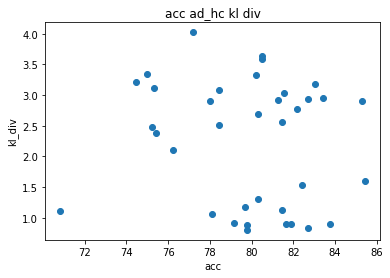

In [51]:
import matplotlib.pyplot as plt
# 假设这是你的数据列表
asr_acc_ad_hc_kl_div_data = [asr_acc_kl_div[key]['acc_ad_hc_kl_div'] for key in asr_acc_kl_div]
manual_acc_ad_hc_kl_div=[80.21,0.9663]
manual_acc_hc_ad_kl_div=[80.21,0.8862]
acc_ad_hc_kl_div_data=[manual_acc_ad_hc_kl_div]+asr_acc_ad_hc_kl_div_data
# 分别提取x和y坐标
x = [point[0] for point in asr_acc_ad_hc_kl_div_data]
y = [point[1] for point in asr_acc_ad_hc_kl_div_data]

# 绘制散点图
plt.scatter(x, y)

# 可以添加标题和轴标签
plt.title('acc ad_hc kl div')
plt.xlabel('acc')
plt.ylabel('kl_div')
# 显示图形
plt.savefig('acc_ad_hc_kl_div_data.jpg',dpi=1024,bbox_inches='tight')
plt.show()


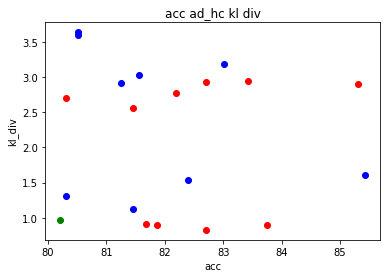

In [61]:
import matplotlib.pyplot as plt
def extract_x_y(data):
    # 分别提取x和y坐标
    x = [point[0] for point in data]
    y = [point[1] for point in data]
    return x,y
# 假设这是你的数据列表
asr_acc_ad_hc_kl_div_fine_tune_data = [asr_acc_kl_div[key]['acc_ad_hc_kl_div'] for key in asr_acc_kl_div if asr_acc_kl_div[key]['acc_ad_hc_kl_div'][0]>80.21 and 'fine_tune' in key]
asr_acc_ad_hc_kl_div_original_data = [asr_acc_kl_div[key]['acc_ad_hc_kl_div'] for key in asr_acc_kl_div if asr_acc_kl_div[key]['acc_ad_hc_kl_div'][0]>80.21 and 'original' in key]
asr_acc_ad_hc_kl_div_fine_tune_data_x,asr_acc_ad_hc_kl_div_fine_tune_data_y=extract_x_y(asr_acc_ad_hc_kl_div_fine_tune_data)
asr_acc_ad_hc_kl_div_original_data_x,asr_acc_ad_hc_kl_div_original_data_y=extract_x_y(asr_acc_ad_hc_kl_div_original_data)
manual_acc_ad_hc_kl_div=[80.21,0.9663]
manual_acc_hc_ad_kl_div=[80.21,0.8862]
plt.scatter(asr_acc_ad_hc_kl_div_fine_tune_data_x, asr_acc_ad_hc_kl_div_fine_tune_data_y, color='red', label='fine_tune')
plt.scatter(asr_acc_ad_hc_kl_div_original_data_x, asr_acc_ad_hc_kl_div_original_data_y, color='blue', label='original')
plt.scatter(manual_acc_ad_hc_kl_div[0], manual_acc_ad_hc_kl_div[1], color='green', label='manual')

# 可以添加标题和轴标签
plt.title('acc ad_hc kl div')
plt.xlabel('acc')
plt.ylabel('kl_div')
# 显示图形
# plt.savefig('test.jpg',dpi=1024,bbox_inches='tight')
plt.show()


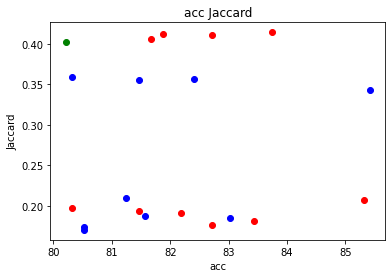

In [62]:
import matplotlib.pyplot as plt
# 假设这是你的数据列表
asr_acc_Jaccard_fine_tune_data = [asr_acc_Jaccard[key] for key in asr_acc_kl_div if asr_acc_Jaccard[key][0]>80.21 and 'fine_tune' in key]
asr_acc_Jaccard_original_data = [asr_acc_Jaccard[key] for key in asr_acc_kl_div if asr_acc_Jaccard[key][0]>80.21 and 'original' in key]
asr_acc_Jaccard_fine_tune_data_x,asr_acc_Jaccard_fine_tune_data_y=extract_x_y(asr_acc_Jaccard_fine_tune_data)
asr_acc_Jaccard_original_data_x,asr_acc_Jaccard_original_data_y=extract_x_y(asr_acc_Jaccard_original_data)
manual_acc_Jaccard=[80.21,0.4021]
plt.scatter(asr_acc_Jaccard_fine_tune_data_x, asr_acc_Jaccard_fine_tune_data_y, color='red', label='fine_tune')
plt.scatter(asr_acc_Jaccard_original_data_x, asr_acc_Jaccard_original_data_y, color='blue', label='original')
plt.scatter(manual_acc_Jaccard[0], manual_acc_Jaccard[1], color='green', label='manual')

plt.title('acc Jaccard')
plt.xlabel('acc')
plt.ylabel('Jaccard')
# 显示图形
# plt.savefig('acc_Jaccard.jpg',dpi=1024,bbox_inches='tight')
plt.show()


#Linguistic Feature Analysis(待定)

In [18]:
import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr

# 示例数据
# 语料库：包括每个文档中的 unigram 和 POS 标签的计数
# 每一行是一个文档，列是特征（unigram 或 POS 标签）
# 我们这里假设有两个 unigram 特征和两个 POS 标签特征
data = pd.DataFrame({
    'unigram_1': [3, 5, 2, 4, 6],    # unigram 1 出现次数
    'unigram_2': [1, 2, 3, 2, 1],    # unigram 2 出现次数
    'pos_tag_1': [2, 1, 3, 2, 4],    # POS 标签 1 出现次数
    'pos_tag_2': [3, 2, 4, 3, 1],    # POS 标签 2 出现次数
    'label': [0, 1, 0, 1, 0]         # 0 代表控制组，1 代表痴呆组
})

# 1. 特征归一化：每个文档的特征总和归一化为 1
features = data.drop(columns='label')  # 提取特征（unigram 和 POS 标签）
normalized_features = features.div(features.sum(axis=1), axis=0)  # 按行归一化

# 2. 计算点二列相关系数
labels = data['label']  # 提取标签（0：控制组，1：痴呆组）

# 计算每个特征和标签之间的点二列相关系数
for feature in normalized_features.columns:
    corr, p_value = pointbiserialr(normalized_features[feature], labels)
    print(f"Feature: {feature}, Point-Biserial Correlation: {corr}, p-value: {p_value}")


Feature: unigram_1, Point-Biserial Correlation: 0.3900780234078029, p-value: 0.5162370439554035
Feature: unigram_2, Point-Biserial Correlation: 0.3462113440207694, p-value: 0.5681616379989044
Feature: pos_tag_1, Point-Biserial Correlation: -0.8128463150723612, p-value: 0.09441638563777395
Feature: pos_tag_2, Point-Biserial Correlation: -0.07078499768710023, p-value: 0.9099490616133089
